In [1]:
#!pip install rdkit


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [3]:
amino_acids = {
    "Gly": "NCC(=O)O",
    "Ala": "CC(C(=O)O)N",
    "Val": "CC(C)C(C(=O)O)N",
    "Leu": "CC(C)CC(C(=O)O)N",
    "Ile": "CC(C)C(C(=O)O)N",
    "Met": "CSCC(C(=O)O)N",
    "Phe": "C1=CC=CC=C1CC(C(=O)O)N",
    "Tyr": "OC1=CC=C(C=C1)CC(C(=O)O)N",
    "Trp": "C1=CC=C2C(=C1)C=CN2CC(C(=O)O)N",
    "Ser": "C(C(C(=O)O)N)O",
    "Thr": "CC(O)C(C(=O)O)N",
    "Cys": "C(C(C(=O)O)N)S",
    "Asn": "NC(C(=O)O)C(=O)N",
    "Gln": "NC(CCC(=O)O)C(=O)N",
    "Asp": "NC(C(=O)O)C(=O)O",
    "Glu": "NC(CCC(=O)O)C(=O)O",
    "Lys": "NCCCC(C(=O)O)N",
    "Arg": "NC(CCCNC(N)=N)C(=O)O",
    "His": "NC(C(=O)O)CC1=CN=CN1",
    "Pro": "C1CC(N)CC1C(=O)O"
}

In [4]:
AA = {
    "A": "Ala", "R": "Arg", "N": "Asn", "D": "Asp", "C": "Cys",
    "Q": "Gln", "E": "Glu", "G": "Gly", "H": "His", "I": "Ile",
    "L": "Leu", "K": "Lys", "M": "Met", "F": "Phe", "P": "Pro",
    "S": "Ser", "T": "Thr", "W": "Trp", "Y": "Tyr", "V": "Val"
}

AA_reversed = {v: k for k, v in AA.items()}

In [5]:
def AA_to_amino_acids(sequence):
  divided = list(sequence.upper())

  three_code = []
  for letter in divided:
    name = AA.get(letter)
    three_code.append(name)

  return three_code


In [6]:
peptide_formation = AllChem.ReactionFromSmarts("[C:1](=[O:2])[O:3].[N:4]>>[C:1](=[O:2])[N:4]")

In [7]:
def build_peptide(sequence):

  mol = Chem.MolFromSmiles(amino_acids[sequence[0]])

  for aa in sequence[1:]:
    next_mol = Chem.MolFromSmiles(amino_acids[aa])
    products = peptide_formation.RunReactants((mol, next_mol))

    if products:
        mol = products[0][0]

  return mol

In [8]:
def peptide_smiles(seqeunce):
  mol = build_peptide(seqeunce)
  return Chem.MolToSmiles(mol)

In [9]:
def peptide_structure(sequence):
  mol = build_peptide(sequence)
  return Draw.MolToImage(mol)

Three-letter code: Lys-Lys.
NCCCC(N)C(=O)NCCCC(N)C(=O)O


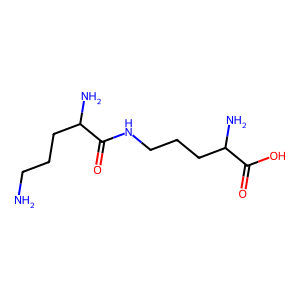

In [13]:
#For one-letter code
AA_code = input("Insert one-letter code for peptide: ")
peptide = AA_to_amino_acids(AA_code)
print(f'Three-letter code: {"-".join(peptide)}.')
print(peptide_smiles(peptide))
peptide_structure(peptide)

One-letter code: DF.
NC(C(=O)O)C(=O)NC(Cc1ccccc1)C(=O)O


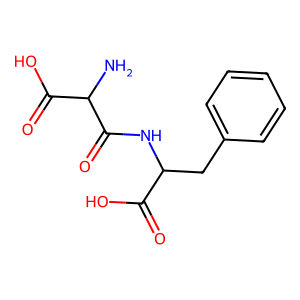

In [ ]:
#For three-letter code
amino_acid_code = input("Insert three-letter code for peptide: ")
peptide = amino_acid_code.split("-")
to_AA_code = []
for item in peptide:
  amac = AA_reversed.get(item)
  to_AA_code.append(amac)
print(f"One-letter code: {''.join(to_AA_code)}.")
print(peptide_smiles(peptide))
peptide_structure(peptide)